# Лабораторная 3. Линейная регрессия

## Импорт необходимых библиотек


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Загрузка данных

In [3]:
data = pd.read_csv('data/california_housing_train.csv')

## 1. Визуализируем основные статистики по датасету
## Описание статистики по числовым данным

In [4]:
stats = data.describe()
print(stats)

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

## Построение графиков для визуализации данных
## Гистограммы для всех числовых признаков

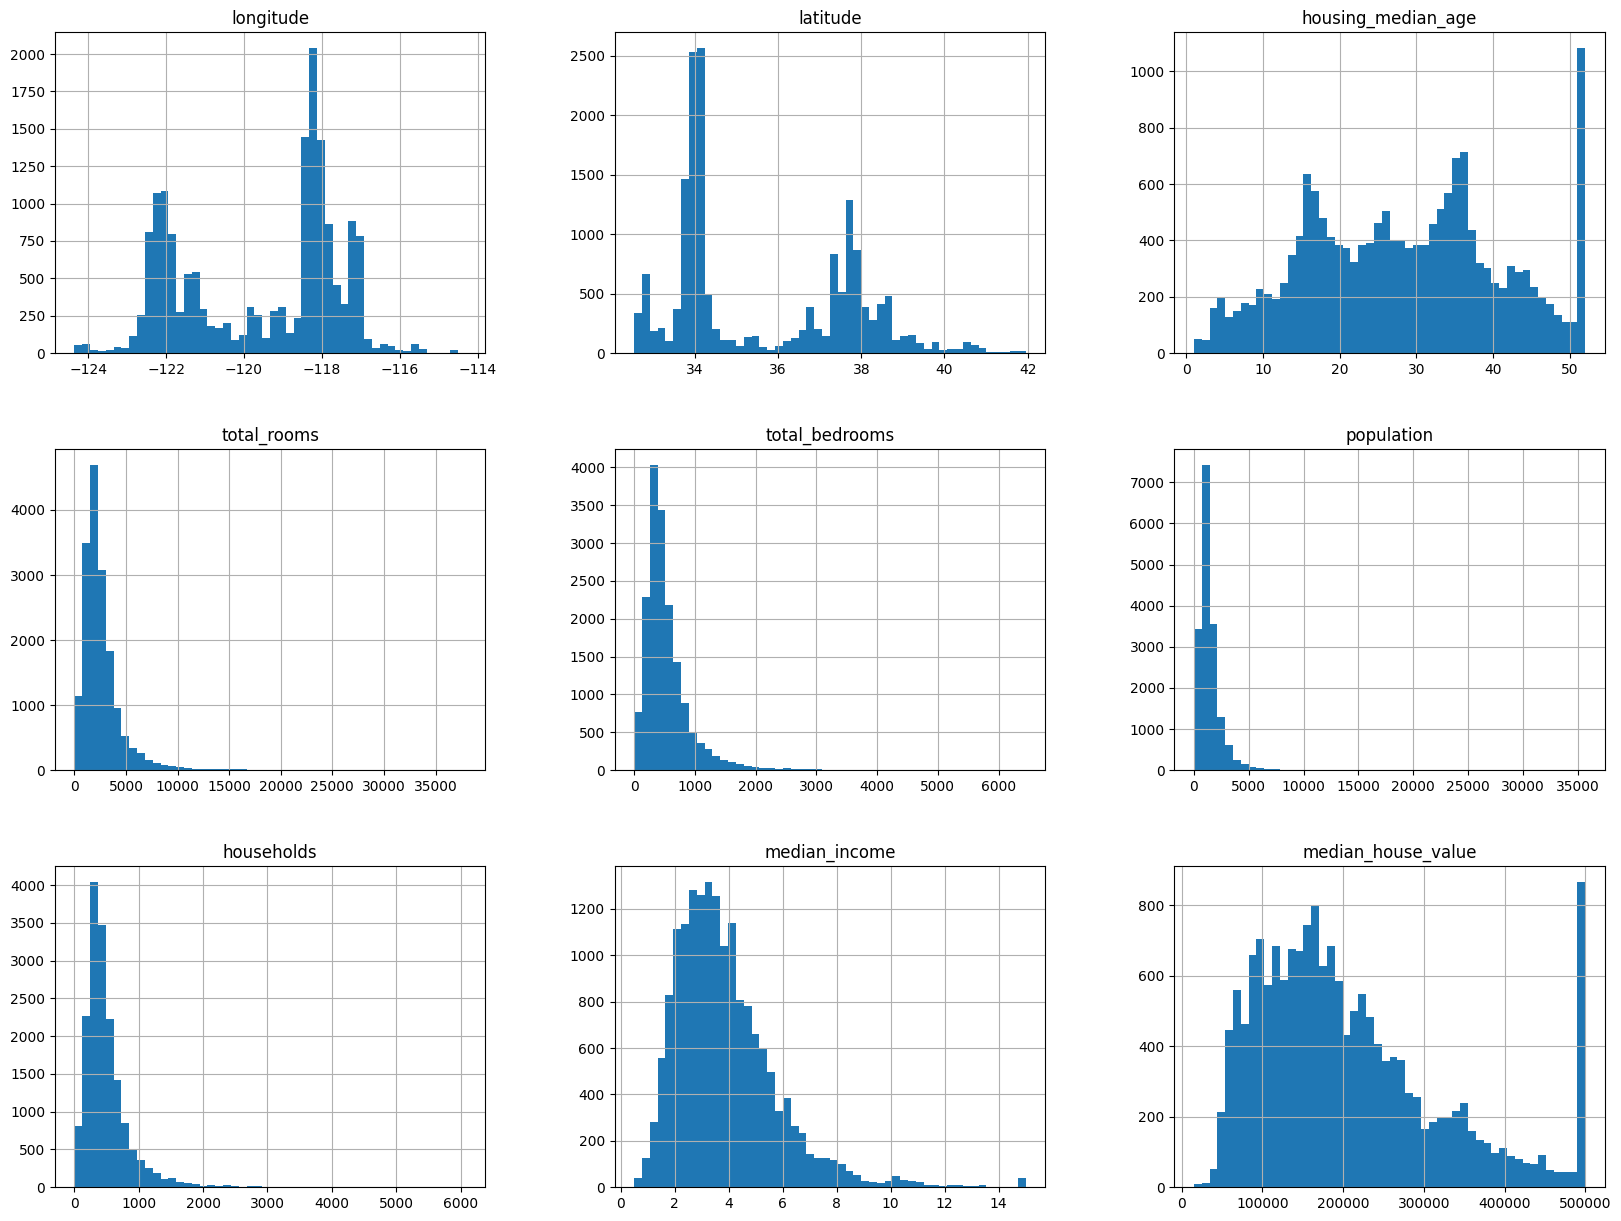

In [5]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Корреляционная матрица для признаков

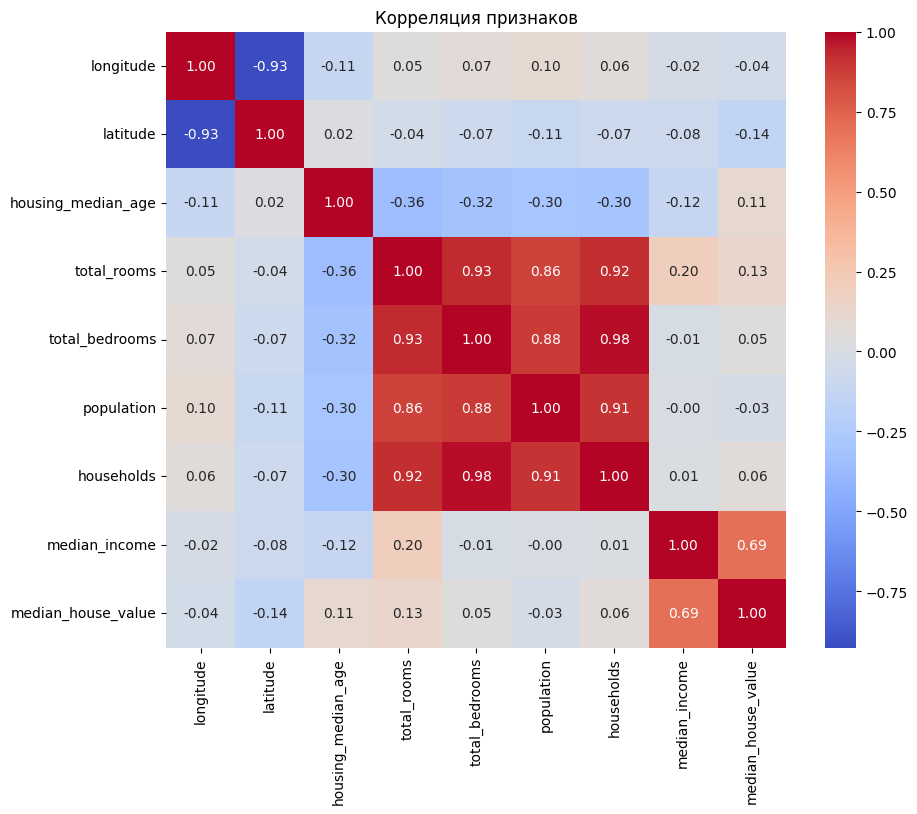

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

## 2. Предварительная обработка данных

## Обработка пропущенных значений
## Проверим, есть ли пропущенные значения в данных

In [7]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


## Заполняем пропущенные значения медианой

In [8]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

## Кодирование категориальных признаков (в данном случае их нет, но если бы были, применили бы one-hot encoding)
## Например, если бы у нас был категориальный признак, применили бы:
## data = pd.get_dummies(data, columns=['categorical_column'])

## Нормировка данных (например, Min-Max или StandardScaler)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[data.columns] = scaler.fit_transform(data[data.columns])

print(data_scaled)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       1.000000  0.175345            0.274510     0.147885        0.198945   
1       0.984064  0.197662            0.352941     0.201608        0.294848   
2       0.975100  0.122210            0.313725     0.018927        0.026847   
3       0.974104  0.116897            0.254902     0.039515        0.052142   
4       0.974104  0.109458            0.372549     0.038276        0.050435   
...          ...       ...                 ...          ...             ...   
16995   0.008964  0.854410            1.000000     0.058389        0.060987   
16996   0.007968  0.866100            0.686275     0.061869        0.081782   
16997   0.004980  0.988310            0.313725     0.070515        0.082247   
16998   0.004980  0.984060            0.352941     0.070384        0.085506   
16999   0.000000  0.850159            1.000000     0.047924        0.046400   

       population  households  median_income  media

## 3. Разделение данных на обучающий и тестовый наборы

In [12]:
X = data_scaled.drop('median_house_value', axis=1)  # Признаки
y = data_scaled['median_house_value']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Реализация линейной регрессии без использования сторонних библиотек, кроме Pandas и NumPy

## Добавляем столбец 1 для модели линейной регрессии

In [13]:
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

## Находим коэффициенты линейной регрессии методом наименьших квадратов
## Коэффициенты = (X^T * X)^(-1) * X^T * y

In [14]:
theta = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)

print(theta)

[ 0.73449498 -0.89977173 -0.83634774  0.11900558 -0.691686    1.5107859
 -2.62310021  0.56606423  1.20170962]


## Предсказания для тестового набора

In [15]:
y_pred = X_test_with_intercept.dot(theta)

print(y_pred)

[0.26550694 0.79095874 0.14709651 ... 0.02367701 0.55372448 0.20785441]


## 5. Оценка производительности модели с использованием коэффициента детерминации (R^2)


In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R^2: {r2:.4f}')

Коэффициент детерминации R^2: 0.6636


## 6. Построение трех моделей с различными наборами признаков

## Модель 1 - Все признаки

In [17]:
X_train_1 = X_train_with_intercept
X_test_1 = X_test_with_intercept
theta_1 = np.linalg.inv(X_train_1.T.dot(X_train_1)).dot(X_train_1.T).dot(y_train)
y_pred_1 = X_test_1.dot(theta_1)
r2_1 = r2_score(y_test, y_pred_1)

## Модель 2 - Признаки с высокой корреляцией

In [ ]:
X_train_2 = X_train_with_intercept[:, [0, 1, 3, 7]]  # Пример выбора признаков (измените по необходимости)
X_test_2 = X_test_with_intercept[:, [0, 1, 3, 7]]
theta_2 = np.linalg.inv(X_train_2.T.dot(X_train_2)).dot(X_train_2.T).dot(y_train)
y_pred_2 = X_test_2.dot(theta_2)
r2_2 = r2_score(y_test, y_pred_2)

## Модель 3 - Без признака latitude

In [ ]:
X_train_3 = X_train.drop('latitude', axis=1)
X_test_3 = X_test.drop('latitude', axis=1)
X_train_3 = np.c_[np.ones(X_train_3.shape[0]), X_train_3]
X_test_3 = np.c_[np.ones(X_test_3.shape[0]), X_test_3]
theta_3 = np.linalg.inv(X_train_3.T.dot(X_train_3)).dot(X_train_3.T).dot(y_train)
y_pred_3 = X_test_3.dot(theta_3)
r2_3 = r2_score(y_test, y_pred_3)

## 7. Сравнение моделей

In [ ]:
print(f'Model 1 R^2: {r2_1:.4f}')
print(f'Model 2 R^2: {r2_2:.4f}')
print(f'Model 3 R^2: {r2_3:.4f}')

## 8. Бонусное задание - Создание синтетического признака

In [ ]:
X_train['interaction_feature'] = X_train['longitude'] * X_train['latitude']
X_test['interaction_feature'] = X_test['longitude'] * X_test['latitude']

## Перестроим модель 1 с синтетическим признаком

In [ ]:
X_train_4 = np.c_[X_train_with_intercept, X_train['interaction_feature']]
X_test_4 = np.c_[X_test_with_intercept, X_test['interaction_feature']]
theta_4 = np.linalg.inv(X_train_4.T.dot(X_train_4)).dot(X_train_4.T).dot(y_train)
y_pred_4 = X_test_4.dot(theta_4)
r2_4 = r2_score(y_test, y_pred_4)

print(f'Model with synthetic feature R^2: {r2_4:.4f}')